Results Testing - CS 136 Final Project
======================================

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### SRMM Testing


In [147]:
PATH = "../SRMM_12_08_13:19:36/"

In [148]:
price_data_first = pd.read_csv(f"{PATH}price_history_0.csv")

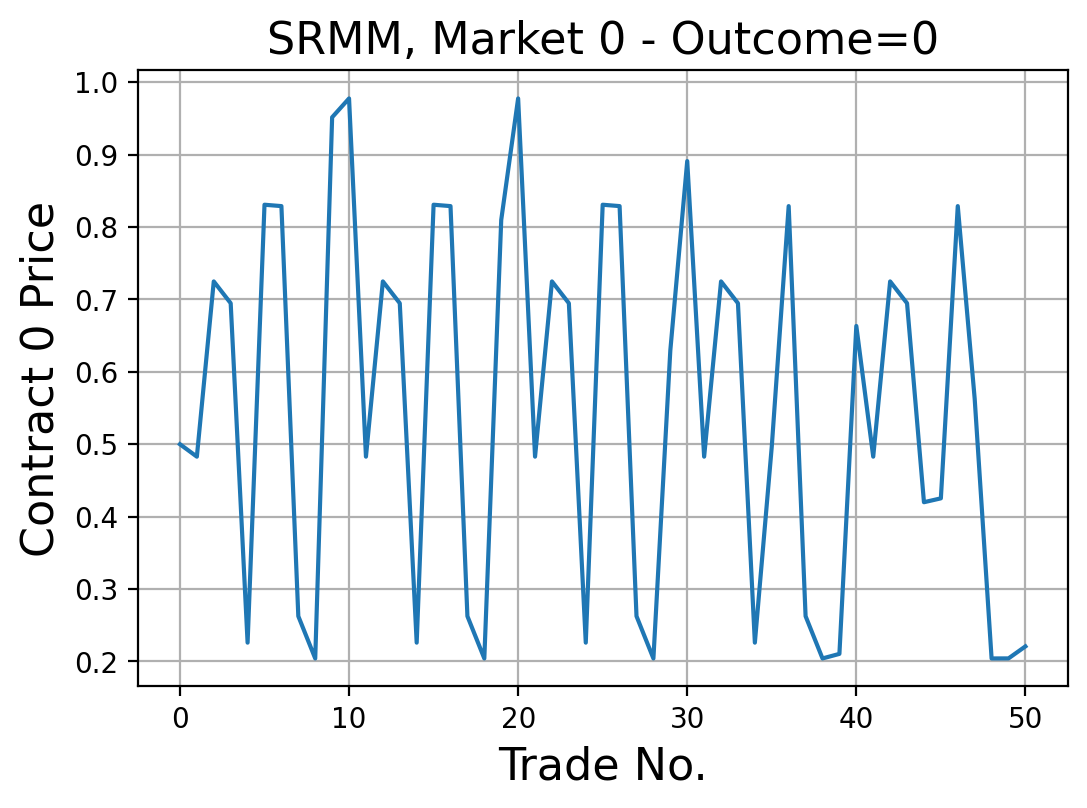

In [149]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(price_data_first["Contract_0"].to_numpy())

ax.set_xlabel("Trade No.", fontsize=16)
ax.set_ylabel("Contract 0 Price", fontsize=16)
ax.set_title("SRMM, Market 0 - Outcome=0", fontsize=16)
plt.grid()

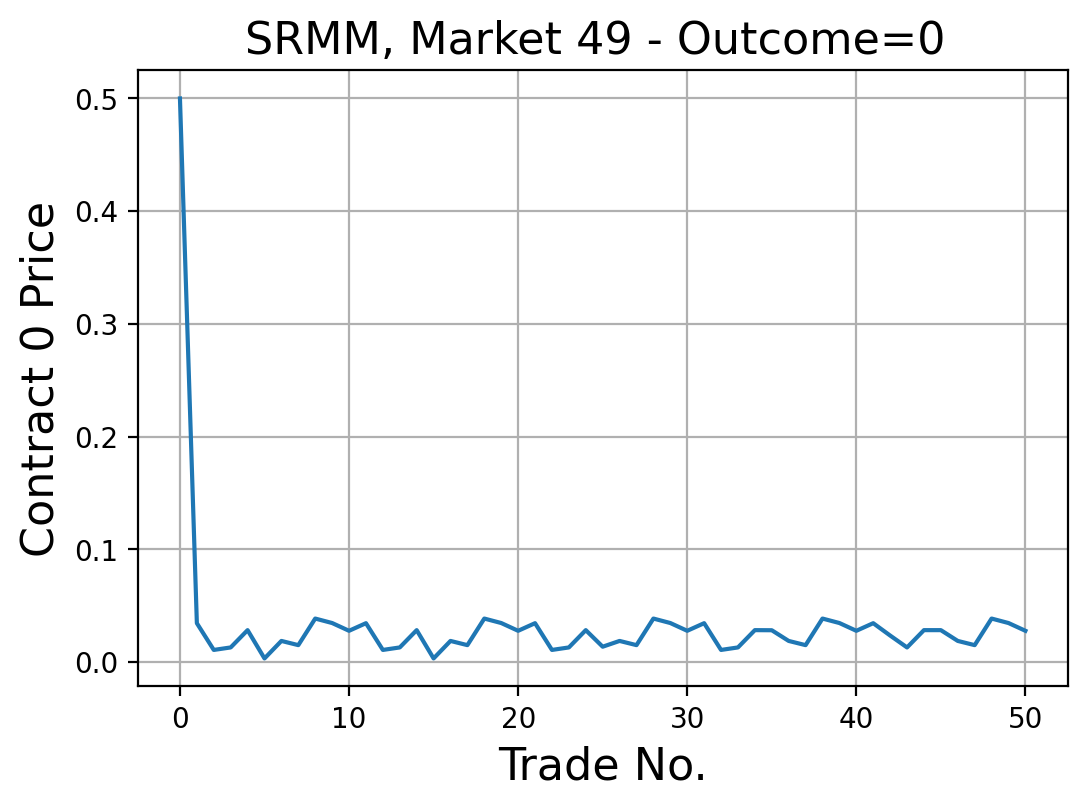

In [150]:
price_data_last = pd.read_csv(f"{PATH}price_history_49.csv")
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(price_data_last["Contract_0"].to_numpy())

ax.set_xlabel("Trade No.", fontsize=16)
ax.set_ylabel("Contract 0 Price", fontsize=16)
ax.set_title("SRMM, Market 49 - Outcome=0 ", fontsize=16)
plt.grid()

In [151]:
market_data_first = pd.read_csv(f"{PATH}market_history_0.csv")

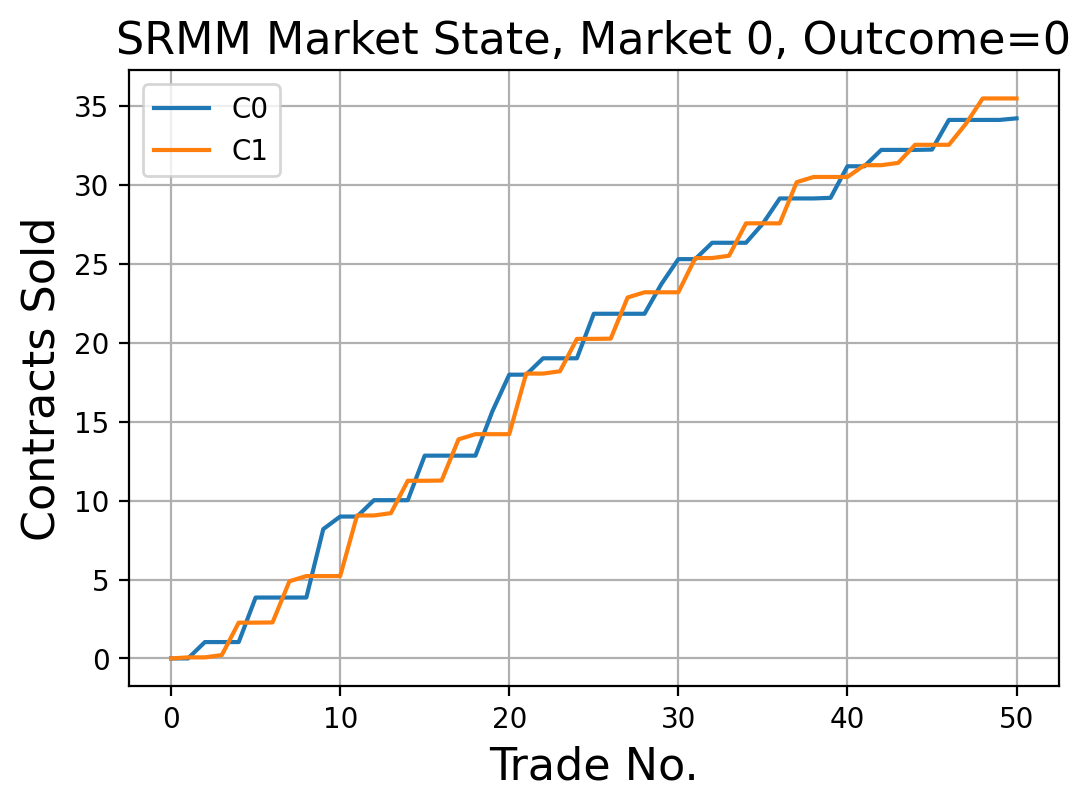

In [152]:
fig, ax = plt.subplots(figsize=(6,4))

C0_market = market_data_first["Contract_0"].to_numpy()
C1_market = market_data_first["Contract_1"].to_numpy()
trades = np.arange(len(C0_market))

ax.plot(trades, C0_market, label="C0")
ax.plot(trades, C1_market, label="C1")
ax.legend()

ax.set_title("SRMM Market State, Market 0, Outcome=0", fontsize=16)
ax.set_xlabel("Trade No.", fontsize=16)
ax.set_ylabel("Contracts Sold", fontsize=16)
plt.grid()

In [153]:
market_data_last = pd.read_csv(f"{PATH}market_history_49.csv")

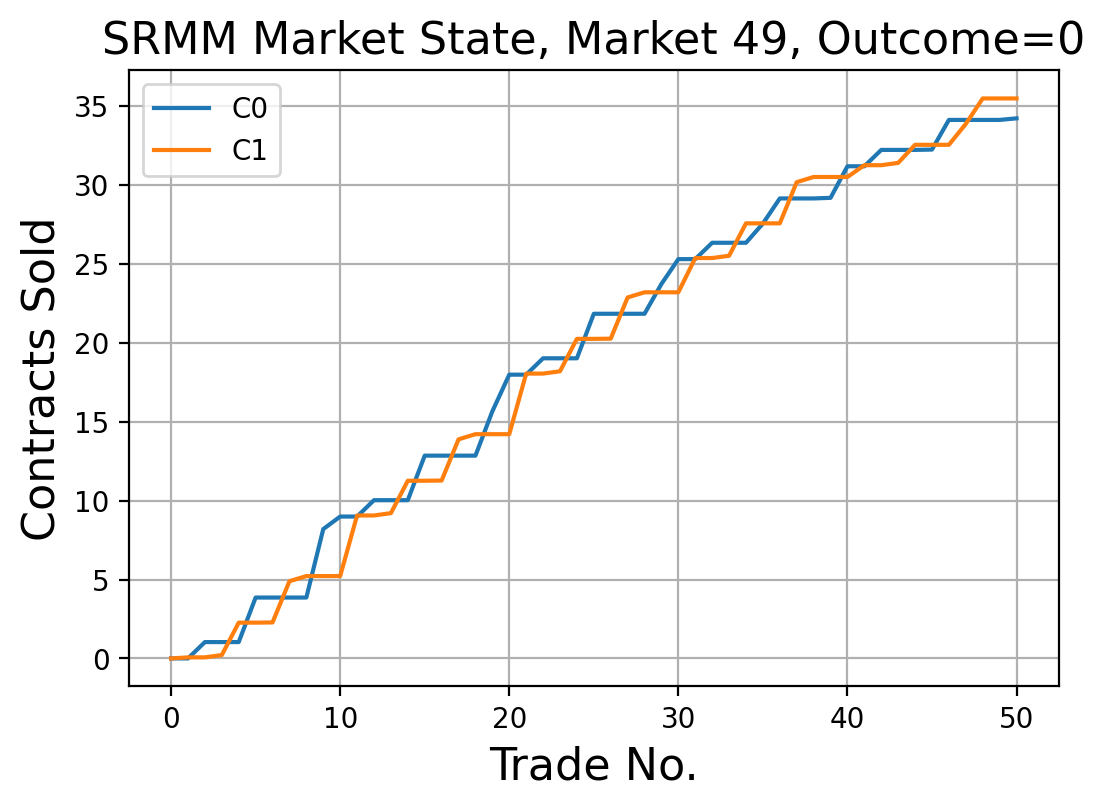

In [154]:
fig, ax = plt.subplots(figsize=(6,4))

C0_market = market_data_first["Contract_0"].to_numpy()
C1_market = market_data_first["Contract_1"].to_numpy()
trades = np.arange(len(C0_market))

ax.plot(trades, C0_market, label="C0")
ax.plot(trades, C1_market, label="C1")
ax.legend()

ax.set_title("SRMM Market State, Market 49, Outcome=0", fontsize=16)
ax.set_xlabel("Trade No.", fontsize=16)
ax.set_ylabel("Contracts Sold", fontsize=16)
plt.grid()

In [36]:
### agent and market PNL

In [159]:
MM_files = !ls ../SRM* | grep "^MM"
MM_PNLs = []
for file in MM_files:
    MM_PNLs.append(np.genfromtxt(f"{PATH}{file}"))
MM_PNLs = np.array(MM_PNLs).flatten()
MM_PNLs.mean()

2.4944388254181917

In [160]:
MM_PNLs

array([ 0.81714881, -0.0821826 ,  1.67960589,  1.74321745,  2.89022758,
        2.94632008,  3.12066673,  3.09204071,  3.36723297,  3.05346834,
        2.87020498,  2.64407065,  0.11314848,  3.44456141,  2.6583743 ,
        3.58436245,  2.55165333,  3.0466872 ,  2.35711721,  3.42411739,
        3.03448624,  2.51669461,  3.80007365,  0.27519487,  2.91269539,
        2.4401819 ,  2.49213819,  2.69280451,  4.21089186,  3.21731894,
        2.8106443 ,  2.49204678,  2.64967923,  3.629016  ,  0.84310431,
        3.43157684,  2.32432126,  3.01321652,  2.43097174,  2.31085965,
        2.89916758,  2.78123718,  2.48391817,  2.85496961,  2.88642015,
        0.7887992 ,  1.68760186,  1.20724147,  2.25774267,  2.02488325])

Text(2, 7, 'Avg PnL: 2.494')

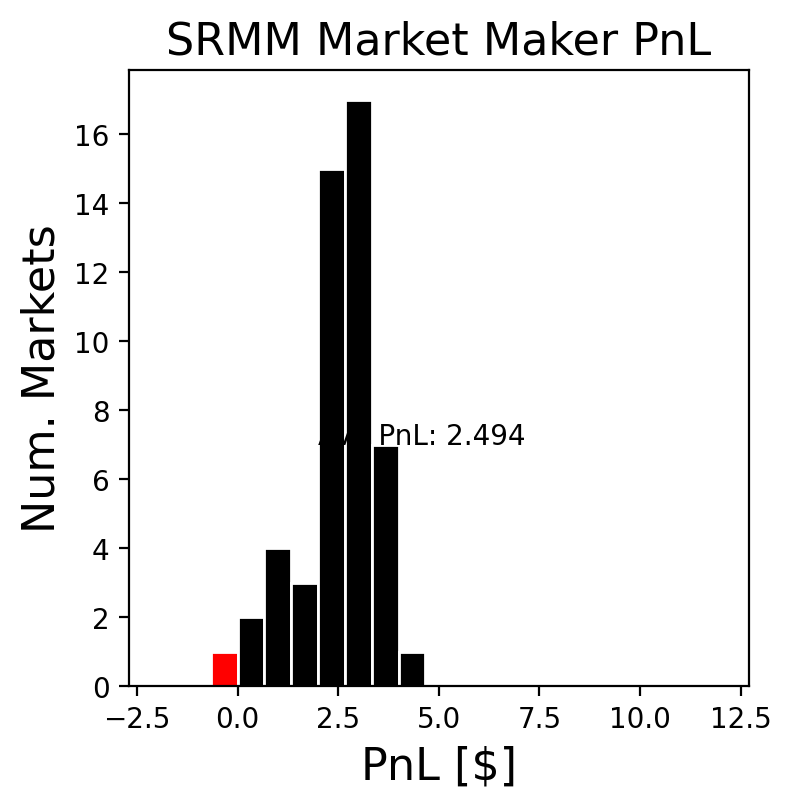

In [161]:
fig, ax = plt.subplots(figsize=(4,4))

N, bins, patches = ax.hist(MM_PNLs, bins=np.linspace(-2.0,12,22), edgecolor='white', linewidth=1)

for i in range(3):
    patches[i].set_facecolor("red")
for i in range(3,21):
    patches[i].set_facecolor("black")
    
ax.set_title("SRMM Market Maker PnL", fontsize=16)
ax.set_xlabel("PnL [\$]",fontsize=16)
ax.set_ylabel("Num. Markets",fontsize=16)
ax.annotate(f"Avg PnL: {round(MM_PNLs.mean(), 3)}", (2,7))

In [162]:
bins

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ,  2.66666667,  3.33333333,  4.        ,
        4.66666667,  5.33333333,  6.        ,  6.66666667,  7.33333333,
        8.        ,  8.66666667,  9.33333333, 10.        , 10.66666667,
       11.33333333, 12.        ])

In [166]:
## agent PNL?

agent_PNL_avg = []

agent_pnl_files = []
for i in range(50):
    agent_pnl_files.append(f"{PATH}agent_pnl_history_{i}.csv")

In [167]:
for file in agent_pnl_files:
    agent_PNL_avg.append(np.genfromtxt(file).mean())

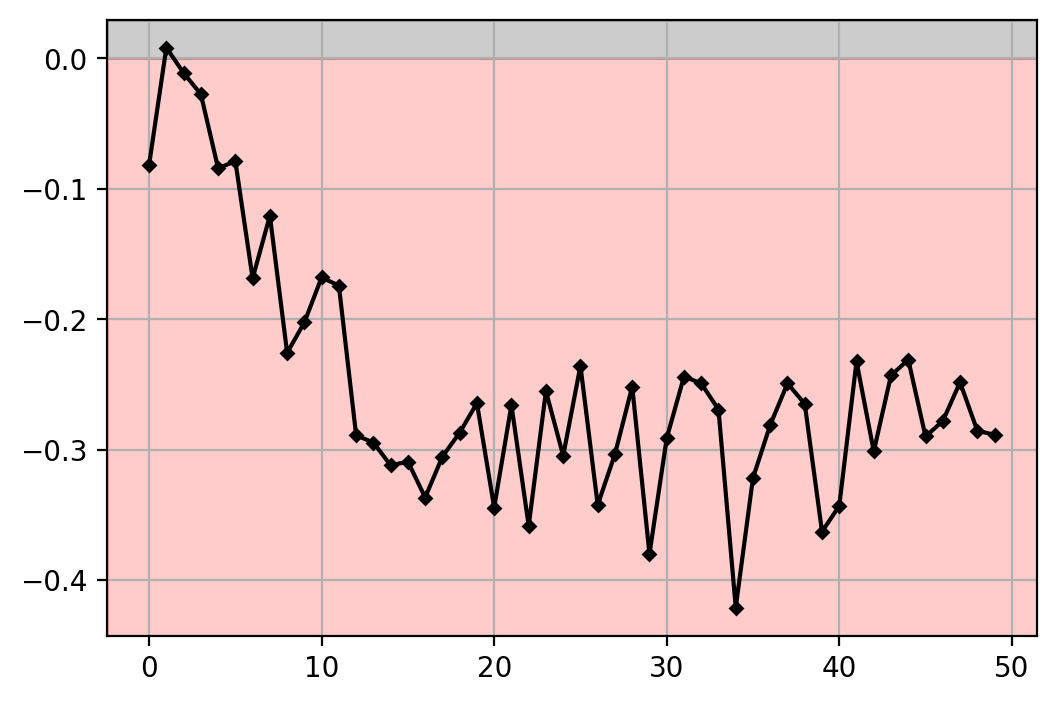

In [168]:
fig, ax = plt.subplots(figsize= (6,4))

ax.plot(agent_PNL_avg, "kD-", markersize=3)
bottom, top =  ax.get_ylim()
ax.autoscale(enable=True, axis='y', tight=True)
ax.axhspan(ymin=bottom,ymax=0, alpha=0.2, color='red')
ax.axhspan(ymin=0,ymax=top, alpha=0.2, color='black')

plt.grid()

In [169]:
np.array(agent_PNL_avg).mean()

-0.24944388254181912

In [172]:
## agent reputation tracking - plot against PnL

agent_rep_data = []
rep_files = !ls ../SRMM* | grep "rep"

for file in rep_files:
    agent_rep_data.append(np.genfromtxt(f"{PATH}{file}").mean())


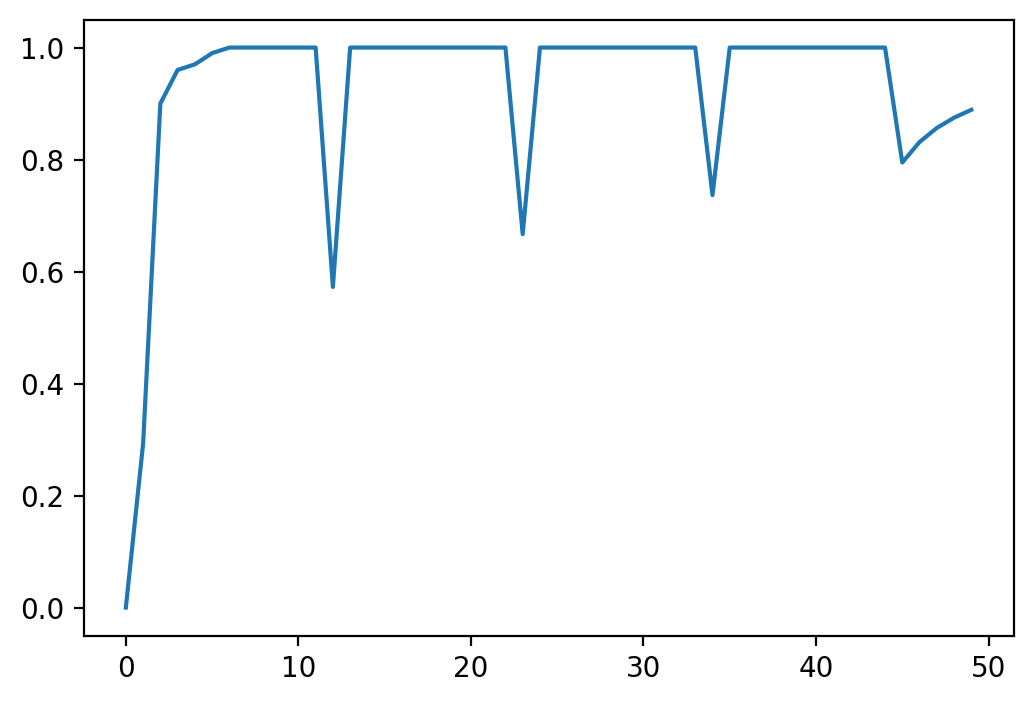

In [173]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(agent_rep_data)